<a href="https://colab.research.google.com/github/hsgarciad/EnvDatSci22/blob/master/DataScienceProject_DataCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Mount Google Drive working folder

In [2]:
#Attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 2. Import libraries, modules, and packages necessary to work with geospatial data

In [ ]:
#Import libraries and packages
%matplotlib inline

import sys
from glob import glob
from osgeo import ogr, gdal, gdal_array
from osgeo import gdalconst
import subprocess

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import numpy as np

import seaborn as sns

!pip install geopandas
import geopandas as gpd
!pip install pycrs
import pycrs
import fiona
from fiona.crs import from_epsg
from shapely.geometry import box
from shapely.geometry import Point
import shapely.geometry as geoms

!pip install rasterio
import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot

!pip install rasterstats
import rasterstats as rs
!pip install georasters
import georasters as gr

!pip install earthpy
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

Step 2.1 I loaded up the raster datasets with rasterio but then I decided to use gdal

In [ ]:
#ndvi_path = '/content/drive/MyDrive/Data/ClassProject/NDVI_chicamocha.tif'
#ndvi_chica=rio.open(ndvi_path)
#train_path = '/content/drive/MyDrive/Data/ClassProject/training_land.tif'
#training_chica=rio.open(train_path)
#show(ndvi_chica,cmap='RdYlGn')

Step 3. Here I load up the raster data (NDVI and Land cover) of the Chicamocha River Canyon and proceed to convert them into an array

In [8]:
#Load NDVI and training data using gdal and create a gdal array
gdal.UseExceptions()
gdal.AllRegister()
ndvi_chica = gdal.Open('/content/drive/MyDrive/Data/ClassProject/NDVI_chicamocha.tif', gdal.GA_ReadOnly)
training_chica = gdal.Open('/content/drive/MyDrive/Data/ClassProject/training_land.tif', gdal.GA_ReadOnly)

ndvi_ar = np.zeros((ndvi_chica.RasterYSize, ndvi_chica.RasterXSize, ndvi_chica.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(ndvi_chica.GetRasterBand(1).DataType))
for b in range(img.shape[2]):
    img[:, :, b] = ndvi_chica.GetRasterBand(b + 1).ReadAsArray()
training_ar = training_chica.GetRasterBand(1).ReadAsArray().astype(np.uint8)


Step 3.1 Display the converted datasets

IndexError: ignored

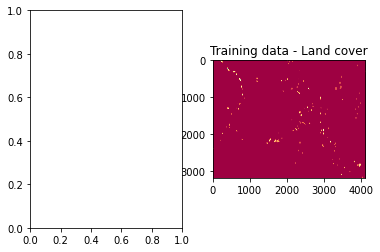

In [7]:
plt.subplot(122)
plt.imshow(training_ar, cmap=plt.cm.Spectral)
plt.title('Training data - Land cover')

plt.subplot(121)
plt.imshow(ndvi_ar[:, :, 4], cmap=plt.cm.Greys_r)
plt.title('NDVI - Chicamocha River canyon')

plt.show()